# task 1

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import re
import os
import random
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

from collections import Counter
from tqdm import notebook

## Load data

In [2]:
# Load data
df_train = pd.read_csv('data/train.tsv',sep='\t')
df_test = pd.read_csv('data/test.tsv',sep='\t')

(array([7.0190e+03, 2.5369e+04, 1.9964e+04, 1.9433e+04, 1.3975e+04,
        9.0640e+03, 8.8090e+03, 7.0600e+03, 5.0760e+03, 5.1660e+03,
        4.3860e+03, 3.1600e+03, 3.3890e+03, 2.5790e+03, 2.7610e+03,
        2.3750e+03, 1.8030e+03, 1.8970e+03, 1.7140e+03, 1.2930e+03,
        1.3470e+03, 1.2290e+03, 9.3700e+02, 8.9000e+02, 6.7200e+02,
        7.3200e+02, 6.2000e+02, 4.5600e+02, 5.0800e+02, 4.2400e+02,
        3.1400e+02, 3.1600e+02, 2.4600e+02, 1.8100e+02, 1.5600e+02,
        1.4100e+02, 1.0800e+02, 1.2100e+02, 7.2000e+01, 6.3000e+01,
        7.2000e+01, 3.6000e+01, 3.6000e+01, 3.4000e+01, 2.4000e+01,
        2.5000e+01, 5.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  1.  ,   6.64,  12.28,  17.92,  23.56,  29.2 ,  34.84,  40.48,
         46.12,  51.76,  57.4 ,  63.04,  68.68,  74.32,  79.96,  85.6 ,
         91.24,  96.88, 102.52, 108.16, 113.8 , 119.44, 125.08, 130.72,
        136.36, 142.  , 147.64, 153.28, 158.92, 164.56, 170.2 , 175.84,
        181.48, 187.12, 192.76

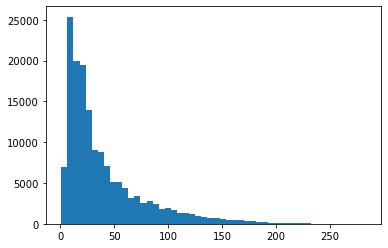

In [3]:
# Length of each sentences
plt.hist([len(p) for p in df_train['Phrase']],bins=50)

## Clean sentences

In [4]:
def clean_sentences(df):
    lemmatizer = WordNetLemmatizer()
    eng_stopwords=stopwords.words("english")
    reviews = []

    for sent in notebook.tqdm(df['Phrase']):
        
        #remove html content
        review_text = BeautifulSoup(sent,'html.parser').get_text()
        
        #remove non-alphabetic characters
        review_text = re.sub("[^a-zA-Z]"," ", review_text)
    
        #tokenize the sentences
        words = word_tokenize(review_text.lower())
        
        #drop out stopwords
        words = [w for w in words if w not in eng_stopwords]
    
        #lemmatize each word to its lemma
        lemma_words = [lemmatizer.lemmatize(i) for i in words]
    
        reviews.append(' '.join(lemma_words))

    return reviews

In [5]:
#cleaned reviews for both train and test set retrieved
train_sentences = clean_sentences(df_train)
test_sentences = clean_sentences(df_test)

D:\Software\Anaconda\lib\site-packages\bs4\__init__.py:314: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
D:\Software\Anaconda\lib\site-packages\bs4\__init__.py:314: UserWarning: "b'...'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


## BoW and TF-IDF with LR

In [15]:
def fit_transform(X, method, max_f, ngram_range=(1,1)):
    if method == 'BoW':
        # Bag of Words
        mol = CountVectorizer(max_features = max_f,ngram_range=ngram_range)
        X_t = mol.fit_transform(X).toarray()
        print("\nX_BoW.shape：",X_t.shape)
        # print(CV.get_feature_names())
        # len(CV.get_feature_names())
    
    if method == 'TF-IDF':
        # TF-IDF
        mol = TfidfVectorizer(max_features = max_f)
        X_t = mol.fit_transform(X).toarray()
        print("\nX_tfidf.shape：",X_t.shape)
        
    return mol,X_t

In [16]:
def train_and_test(X_t,target,test_size,max_iter):
    # split into train and validation sets (shuffled)
    X_train,X_val,y_train,y_val=train_test_split(X_t,target,test_size=test_size,stratify=target)
    
    clf = LogisticRegression(max_iter=max_iter,random_state=0).fit(X_train, y_train)
    clf.predict(X_val)
    return clf,clf.score(X_val,y_val)

In [17]:
max_feature = 1000
test_size = 0.2
max_iter = 10000
target=df_train.Sentiment.values

mol_fit1,X_fit = fit_transform(train_sentences,'BoW',max_feature)
model1,acc = train_and_test(X_fit,target,test_size,max_iter)
print('\nAccuracy for Bag of Words: ',acc)

mol_fit2,X_fit = fit_transform(train_sentences,'TF-IDF',max_feature)
model2,acc = train_and_test(X_fit,target,test_size,max_iter)
print('\nAccuracy for TF-IDF: ',acc)


X_BoW.shape： (156060, 1000)

Accuracy for Bag of Words:  0.5842945021145713

X_tfidf.shape： (156060, 1000)

Accuracy for TF-IDF:  0.5822119697552224


## N-gram with LR

In [18]:
max_feature = 1000
test_size = 0.2
max_iter = 10000
target=df_train.Sentiment.values

mol_fit3,X_fit = fit_transform(train_sentences,'BoW',max_feature,(1,2))
model3,acc = train_and_test(X_fit,target,test_size,max_iter)
print('\nAccuracy for 2-gram: ',acc)


X_BoW.shape： (156060, 1000)

Accuracy for 2-gram:  0.5857362552864283


In [19]:
mol_fit4,X_fit = fit_transform(train_sentences,'BoW',max_feature,(1,3))
model4,acc = train_and_test(X_fit,target,test_size,max_iter)
print('\nAccuracy for 3-gram: ',acc)


X_BoW.shape： (156060, 1000)

Accuracy for 3-gram:  0.5817954632833525


## Test submission

In [21]:
X_fit = mol_fit3.fit_transform(test_sentences).toarray()
y_pred = model3.predict(X_fit)

sub_file = pd.read_csv('sampleSubmission.csv',sep=',')
sub_file.Sentiment = y_pred
sub_file.to_csv('Submission3.csv',index=False)